In [18]:
# Necessary libraries
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Loading data
(x_train, y_train),(x_test, y_test) = datasets.mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


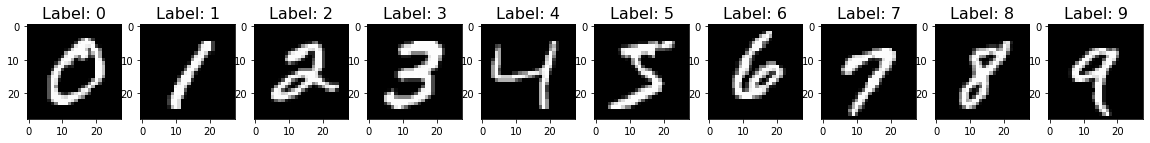

In [3]:
# Visualizing examples

num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range (0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}" .format(i), fontsize=16)



In [4]:
# One hot encoding

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [5]:
# Normalizing data
x_train = x_train / 255.0
x_test = x_test / 255.0

print("X_train",x_train.shape)
print("Y_train",y_train.shape)

X_train (60000, 28, 28)
Y_train (60000, 10)


In [6]:
# Defining the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(10, activation='softmax')
])

#Compiling

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Training
history = model.fit(x_train, y_train, epochs=20, batch_size=256,
                    validation_data=(x_test, y_test))


Epoch 1/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5098 - accuracy: 0.8529 - val_loss: 0.2395 - val_accuracy: 0.9329
Epoch 2/20
235/235 [==============================] - 1s 2ms/step - loss: 0.2444 - accuracy: 0.9309 - val_loss: 0.1743 - val_accuracy: 0.9499
Epoch 3/20
235/235 [==============================] - 1s 2ms/step - loss: 0.1874 - accuracy: 0.9466 - val_loss: 0.1431 - val_accuracy: 0.9568
Epoch 4/20
235/235 [==============================] - 1s 2ms/step - loss: 0.1567 - accuracy: 0.9542 - val_loss: 0.1195 - val_accuracy: 0.9645
Epoch 5/20
235/235 [==============================] - 1s 2ms/step - loss: 0.1340 - accuracy: 0.9612 - val_loss: 0.1079 - val_accuracy: 0.9685
Epoch 6/20
235/235 [==============================] - 1s 2ms/step - loss: 0.1192 - accuracy: 0.9656 - val_loss: 0.1000 - val_accuracy: 0.9697
Epoch 7/20
235/235 [==============================] - 1s 2ms/step - loss: 0.1067 - accuracy: 0.9684 - val_loss: 0.0901 - val_accuracy: 0.9730
Epoch 

313/313 - 0s - loss: 0.0687 - accuracy: 0.9800


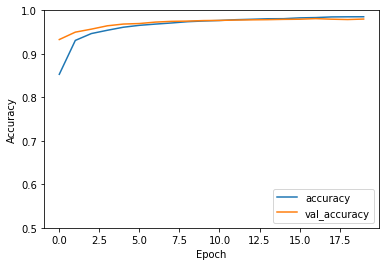

In [10]:
# Evaluation

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [12]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

[[1.0098883e-06 1.8332409e-08 9.8391092e-06 ... 9.9956220e-01
  6.7222140e-07 2.1470842e-05]
 [8.8698317e-07 2.2770917e-04 9.9976474e-01 ... 1.4224070e-13
  4.4182411e-08 2.0474799e-14]
 [4.2253802e-07 9.9915195e-01 1.0135253e-04 ... 6.4399448e-04
  6.2983032e-05 1.6477973e-08]
 ...
 [2.2688626e-12 1.9994051e-09 1.3443036e-11 ... 3.0008348e-06
  8.3916717e-07 5.3835747e-06]
 [2.9364991e-10 7.6311668e-10 1.4561656e-12 ... 2.9148821e-09
  4.1671341e-05 5.5345056e-12]
 [7.2840447e-07 5.6568244e-12 1.0473559e-08 ... 2.2380836e-13
  1.2910193e-09 2.2820526e-12]]
[7 2 1 ... 4 5 6]


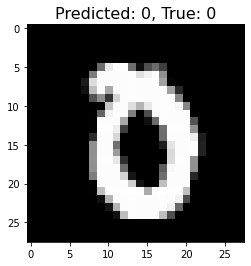

In [20]:
# Single example

random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')

Text(0.5, 1.0, 'Confusion Matrix')

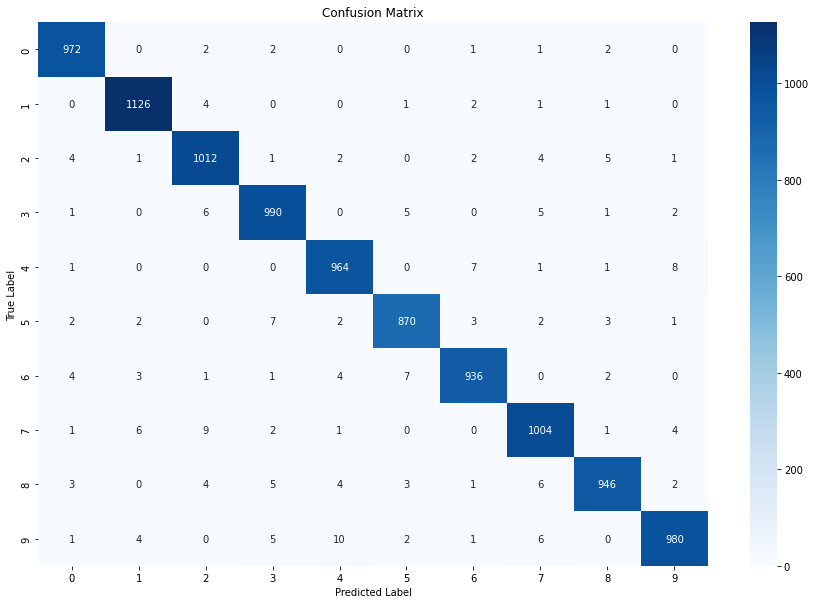

In [23]:
# Confusion matrix

conf_mtx = confusion_matrix(y_true, y_pred_classes)

# Plotting

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(conf_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')